In [11]:
!pip install yahooquery 
!pip install scikit-learn


In [1]:
# Importing libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from yahooquery import Ticker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

wmt = Ticker('wmt')

##### Collecting Walmart Daily Stock Price

In [2]:
df=wmt.history(start='2014-01-01', end='2023-12-31') 
df

open       high        low      close    volume  \
symbol date                                                               
wmt    2014-01-02  26.240000  26.490000  26.166668  26.303333  20634000   
       2014-01-03  26.270000  26.376667  26.173332  26.216667  14872200   
       2014-01-06  26.286667  26.303333  25.930000  26.070000  21840600   
       2014-01-07  26.056667  26.283333  25.973333  26.150000  15036900   
       2014-01-08  26.166668  26.170000  25.866667  25.943333  17865600   
...                      ...        ...        ...        ...       ...   
       2023-12-22  51.816666  52.383331  51.720001  52.216667  19405500   
       2023-12-26  52.216667  52.330002  52.036667  52.136665  11679900   
       2023-12-27  52.103333  52.650002  52.053333  52.626667  19896000   
       2023-12-28  52.590000  52.776669  52.500000  52.523335  16776000   
       2023-12-29  52.509998  52.693333  52.386665  52.549999  21948300   

                    adjclose  dividends  
symbol date                              
wmt    2014-01-02  21.187391        0.0  
       2014-01-03  21.117580        0.0  
       2014-01-06  20.999443        0.0  
       2014-01-07  21.063877        0.0  
       2014-01-08  20.897404        0.0  
...                      ...        ...  
       2023-12-22  52.039433        0.0  
       2023-12-26  51.959702        0.0  
       2023-12-27  52.448040        0.0  
       2023-12-28  52.345058        0.0  
       2023-12-29  52.371632        0.0  

[2516 rows x 7 columns]

##### Feature Engineering

In [3]:
dataset = df.dropna() 
dataset = dataset[['open', 'high', 'low', 'close']]

dataset['High-Low'] = dataset['high'] - dataset['low'] 
dataset['Open-Close'] = dataset['close'] - dataset['open'] 
dataset['3day MA'] = dataset['close'].shift(1).rolling(window = 3).mean() 
dataset['10day MA'] = dataset['close'].shift(1).rolling(window = 10).mean() 

dataset['30day MA'] = dataset['close'].shift(1).rolling(window = 30).mean() 
dataset['3day Std_deviation']= dataset['close'].rolling(3).std() 
dataset['30day Std_deviation']= dataset['close'].rolling(30).std() 

dataset['Price_Rise'] = np.where(dataset['close'].shift(-1) > dataset['close'], 1, 0)
dataset = dataset.dropna()
dataset.drop(columns=[dataset.columns[0], dataset.columns[1], dataset.columns[2], dataset.columns[3]])


High-Low  Open-Close    3day MA   10day MA   30day MA  \
symbol date                                                                
wmt    2014-02-14  0.296667    0.129999  25.013334  24.613000  25.231889   
       2014-02-18  0.263334   -0.053333  25.123334  24.650000  25.197222   
       2014-02-19  0.303333   -0.053331  25.164445  24.739000  25.160333   
       2014-02-20  0.396667    0.156666  25.107778  24.809667  25.123000   
       2014-02-21  0.193335   -0.023335  24.855556  24.831333  25.068222   
...                     ...         ...        ...        ...        ...   
       2023-12-22  0.663330    0.400002  51.560000  51.047667  52.199778   
       2023-12-26  0.293335   -0.080002  51.684444  51.240667  52.119000   
       2023-12-27  0.596668    0.523335  51.984444  51.413000  52.010334   
       2023-12-28  0.276669   -0.066666  52.326667  51.630333  51.901445   
       2023-12-29  0.306667    0.040001  52.428889  51.747667  51.789445   

                   3day Std_deviation  30day Std_deviation  Price_Rise  
symbol date                                                             
wmt    2014-02-14            0.138362             0.634760           0  
       2014-02-18            0.085785             0.604928           0  
       2014-02-19            0.156678             0.580937           0  
       2014-02-20            0.312559             0.557775           0  
       2014-02-21            0.301902             0.546372           1  
...                               ...                  ...         ...  
       2023-12-22            0.495427             1.640721           0  
       2023-12-26            0.335334             1.519641           1  
       2023-12-27            0.262869             1.337992           0  
       2023-12-28            0.258293             1.115277           1  
       2023-12-29            0.053645             0.670244           0  

[2486 rows x 8 columns]

#### EDA

##### Descriptive Statistics

In [4]:
descriptive_stats = dataset.describe()
descriptive_stats

,open,high,low,close,High-Low,Open-Close,3day MA,10day MA,30day MA,3day Std_deviation,30day Std_deviation,Price_Rise
count,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000,2486.000000
mean,35.492715,35.779902,35.227546,35.503032,0.552356,0.010316,35.480900,35.442274,35.336304,0.274386,0.834861,0.521319
std,10.504613,10.595554,10.411832,10.501807,0.387353,0.393259,10.489842,10.467320,10.408126,0.285919,0.581976,0.499646
min,18.796667,19.020000,18.766666,18.806667,0.093334,-2.266666,18.994445,19.311333,19.547778,0.005091,0.099019,0.000000
25%,25.443333,25.575000,25.334166,25.437500,0.296667,-0.166668,25.440833,25.436250,25.440028,0.111354,0.418599,0.000000
50%,33.141666,33.299999,32.841667,33.131666,0.453332,0.006668,33.062778,32.941000,32.879778,0.199976,0.678914,1.000000
75%,46.365835,46.720001,45.965000,46.415834,0.680000,0.196667,46.378055,46.335417,46.442472,0.342614,1.122480,1.000000
max,56.126667,56.646667,55.836666,56.593334,4.526665,2.833332,56.123333,55.341000,54.123667,4.364066,4.797883,1.000000


##### Outliers

In [5]:
#standardizing closing price

Close_Z_Score = (dataset['close'] - dataset['close'].mean()) / dataset['close'].std()

# Define threshold for outlier detection
outlier_threshold = 3

# Identify outliers based on the threshold
outliers = dataset[abs(Close_Z_Score) > outlier_threshold]

# Print the outliers
print("Potential Outliers Detected:")
print(outliers)

Potential Outliers Detected:
Empty DataFrame
Columns: [open, high, low, close, High-Low, Open-Close, 3day MA, 10day MA, 30day MA, 3day Std_deviation, 30day Std_deviation, Price_Rise]
Index: []


##### Plotting Daily Closing Price Vs Volume

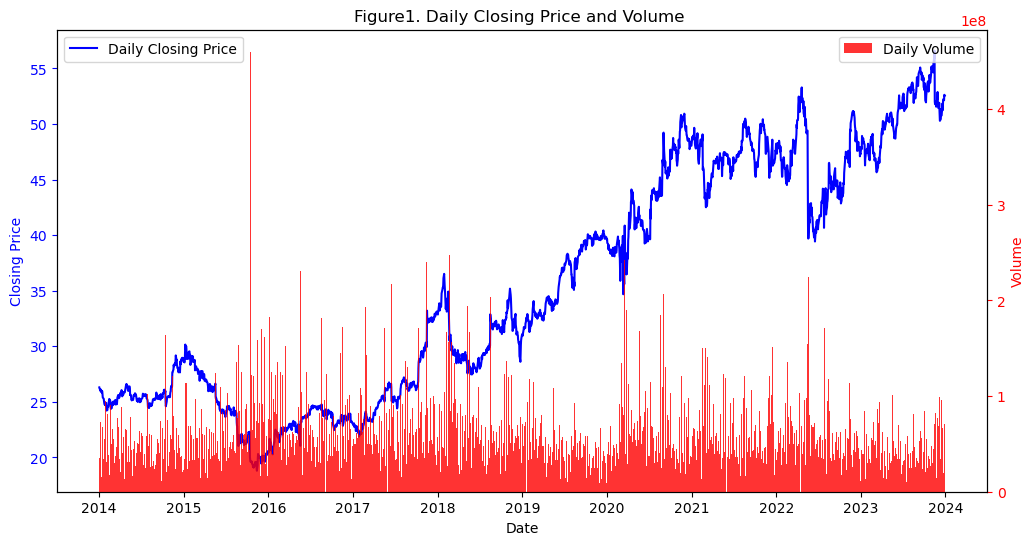

In [6]:
# Extract data for Walmart stock ('WMT')
walmart_data = df.loc['wmt']

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot daily stock price
ax1.plot(walmart_data.index, walmart_data['close'], color='b', label='Daily Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for volume
ax2 = ax1.twinx()
ax2.hist(walmart_data.index, bins=1000, weights=walmart_data['volume'], color='r', alpha=0.8, label='Daily Volume')
ax2.set_ylabel('Volume', color='r')
ax2.tick_params('y', colors='r')

# Add legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Title and display the plot
plt.title('Figure1. Daily Closing Price and Volume ')
plt.show()

##### Plotting moving averages

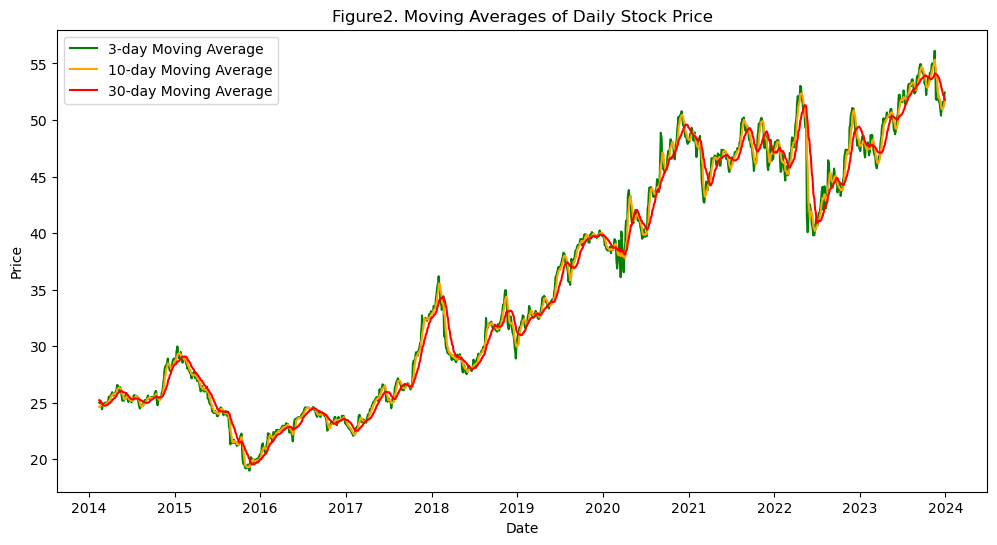

In [7]:
walmart_data = dataset.loc['wmt']

# Plot moving averages
plt.figure(figsize=(12, 6))  # Set the width and height of the figure

plt.plot(walmart_data.index,dataset['3day MA'], label='3-day Moving Average', color='g')
plt.plot(walmart_data.index,dataset['10day MA'], label='10-day Moving Average', color='orange')
plt.plot(walmart_data.index,dataset['30day MA'], label='30-day Moving Average', color='r')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Figure2. Moving Averages of Daily Stock Price')

# Add legend
plt.legend()

# Display the plot
plt.show()

##### Plotting MA Histogram and Density

Text(0.5, 1.0, 'Figure3. 3day MA histogram and density')

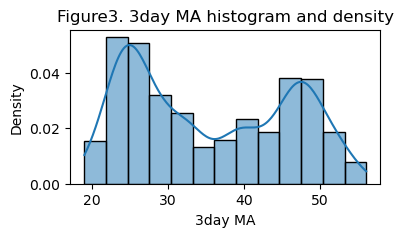

In [8]:
#3-day Moving Average
plt.figure(figsize=(4, 2))
sns.histplot(dataset,x="3day MA", kde=True, stat="density")
plt.title('Figure3. 3day MA histogram and density')

Text(0.5, 1.0, 'Figure4. 10day MA histogram and density')

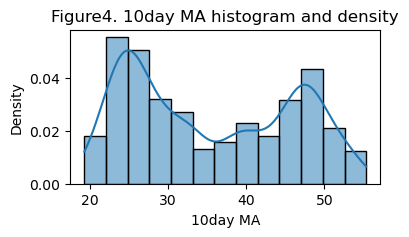

In [9]:
#10-day Moving Average
plt.figure(figsize=(4, 2))
sns.histplot(dataset,x="10day MA", kde=True, stat="density")
plt.title('Figure4. 10day MA histogram and density')

Text(0.5, 1.0, 'Figure5. 30day MA histogram and density')

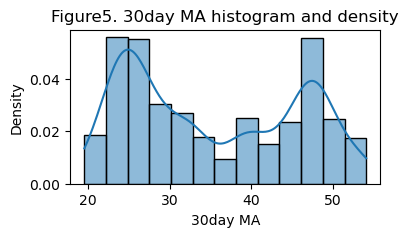

In [10]:
#30-day Moving Average
plt.figure(figsize=(4, 2))
sns.histplot(dataset,x="30day MA", kde=True, stat="density")
plt.title('Figure5. 30day MA histogram and density')

##### Plotting Fluctuations

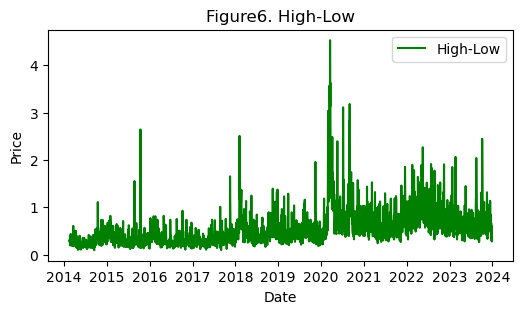

In [11]:
#Plotting High_Low
walmart_data = dataset.loc['wmt']
plt.figure(figsize=(6, 3))  # Set the width and height of the figure
plt.plot(walmart_data.index,dataset['High-Low'], label='High-Low', color='g')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Figure6. High-Low')
plt.legend()
plt.show()

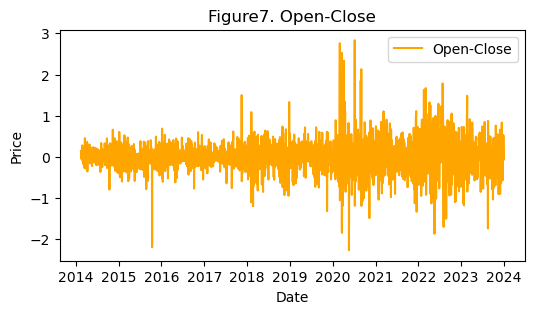

In [12]:
#Plotting Open-Close
walmart_data = dataset.loc['wmt']
plt.figure(figsize=(6, 3))  # Set the width and height of the figure
plt.plot(walmart_data.index,dataset['Open-Close'], label='Open-Close', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Figure7. Open-Close')
plt.legend()
plt.show()

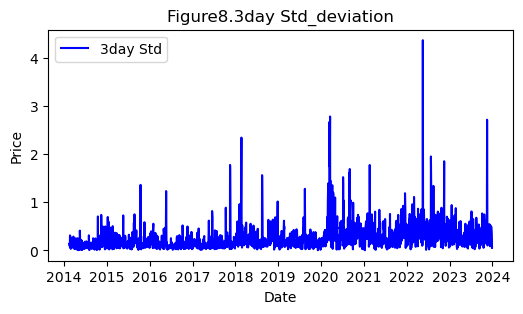

In [13]:
#Plotting 3-day Standard Deviation
walmart_data = dataset.loc['wmt']
plt.figure(figsize=(6, 3))  # Set the width and height of the figure
plt.plot(walmart_data.index,dataset['3day Std_deviation'], label='3day Std', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Figure8.3day Std_deviation')
plt.legend()
plt.show()

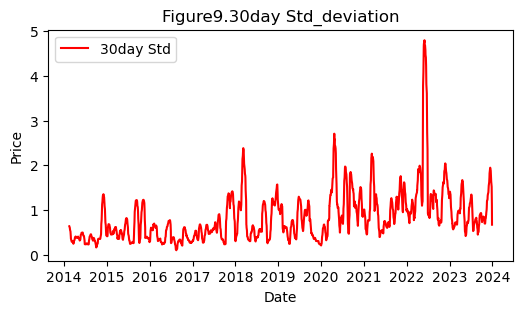

In [14]:
#Plotting 30-day Standard Deviation
walmart_data = dataset.loc['wmt']
plt.figure(figsize=(6, 3))  # Set the width and height of the figure
plt.plot(walmart_data.index,dataset['30day Std_deviation'], label='30day Std', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Figure9.30day Std_deviation')
plt.legend()
plt.show()

##### Plotting Price Rise

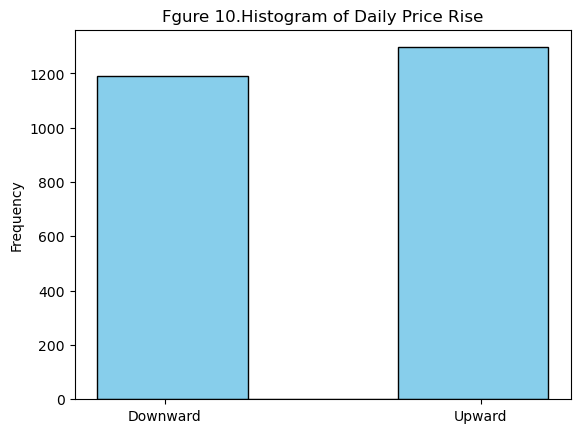

In [15]:
# Plotting the histogram of Price Rise
plt.hist(dataset['Price_Rise'], bins=3, color='skyblue', edgecolor='black')
plt.title('Fgure 10.Histogram of Daily Price Rise')
plt.ylabel('Frequency')

# Set x-axis ticks to represent 0 and 1
plt.xticks([0.15, 0.85], ['Downward', 'Upward'])

plt.show()


#### Correlation Analysis

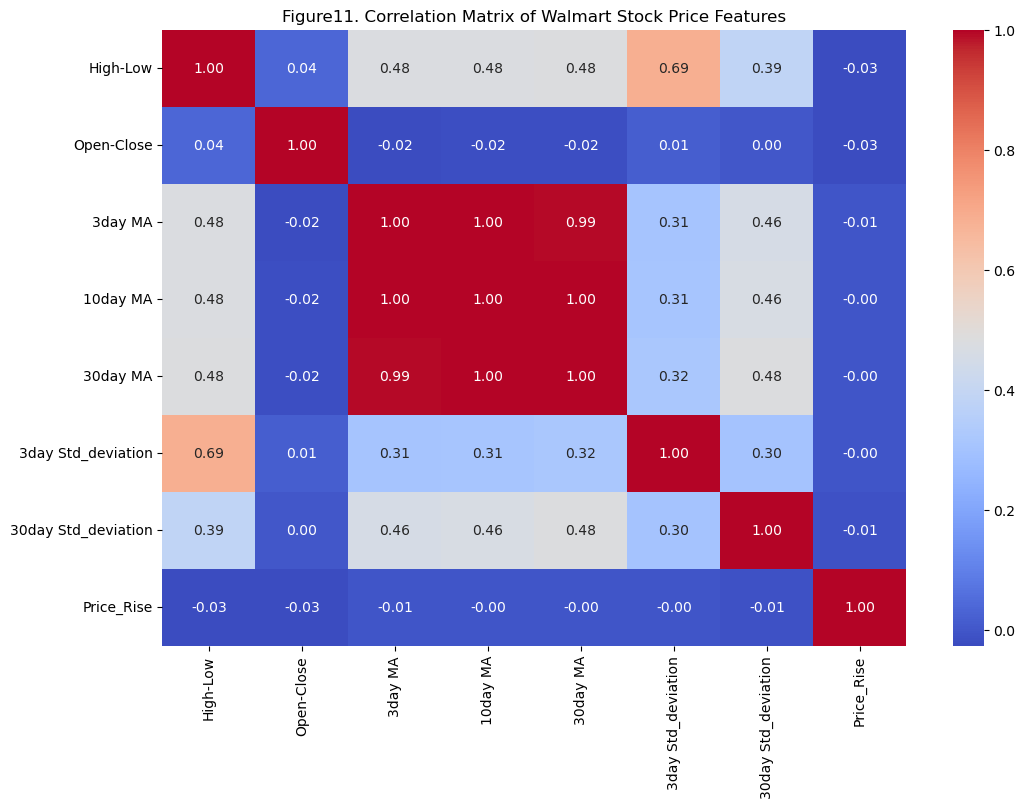

In [16]:
columns = [ 'High-Low', 'Open-Close','3day MA', '10day MA', '30day MA', '3day Std_deviation', '30day Std_deviation', 'Price_Rise']
correlation_data = dataset[columns]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize correlation matrix as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Figure11. Correlation Matrix of Walmart Stock Price Features')
plt.show()


#### Machine Learning Classification

In [17]:
# Define feature X (predictors) and target variable Y

X = dataset.iloc[:, 0:-1]    #X=[open, high, low, close, High-Low, Open-Close, 3day MA, 10day MA, 30day MA, 3day Std_deviation, 30day Std_deviation]
Y = dataset.iloc[:, -1]     #Y=Price Rise

In [18]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

##### Logistic Regression

In [19]:
logistic = LogisticRegression(max_iter=1000)  #Logistic model
logistic.fit(X_train, Y_train) #Training logistic model
Y_pred = logistic.predict(X_test)  #Predicting using test data

print (classification_report(Y_test, Y_pred)) # Classification report

              precision    recall  f1-score   support

           0       0.50      0.13      0.21       362
           1       0.52      0.88      0.65       384

    accuracy                           0.51       746
   macro avg       0.51      0.50      0.43       746
weighted avg       0.51      0.51      0.44       746



In [20]:
# Cross-validation of logistic regression on the entire dataset

scores = cross_val_score(logistic, X, Y, cv=5)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.3f}")

Mean Accuracy: 0.532
Standard Deviation of Accuracy: 0.006


##### Extra Trees

In [21]:
trees = ExtraTreesClassifier(random_state=42) #Extra-trees model
trees.fit(X_train, Y_train)  #Training Extra-trees
Y_pred = trees.predict(X_test)   #Predicting using test data

print (classification_report(Y_test, Y_pred)) # Classification report

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       362
           1       0.55      0.57      0.56       384

    accuracy                           0.54       746
   macro avg       0.54      0.54      0.54       746
weighted avg       0.54      0.54      0.54       746



In [22]:
# Cross-validation of Extra Trees model on the entire dataset
scores = cross_val_score(trees, X, Y, cv=5)
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.3f}")
print(f"Standard Deviation of Accuracy: {std_accuracy:.3f}")

Mean Accuracy: 0.475
Standard Deviation of Accuracy: 0.021


#### Predicting Price Rise

In [23]:
logistic = LogisticRegression(max_iter=1000)  #Logistic model
logistic.fit(X_train, Y_train) #Training logistic model
Y_pred = logistic.predict(X_test)  #Predicting using test data

print(Y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 

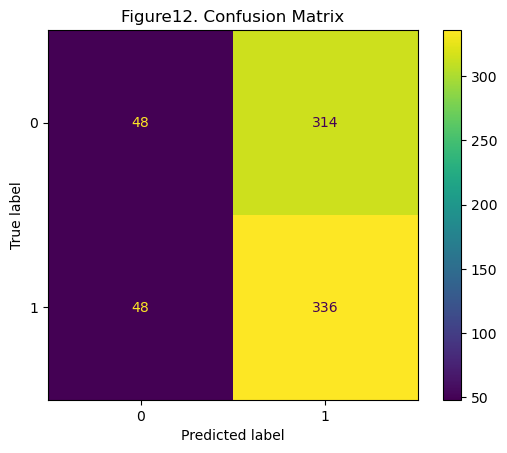

In [24]:
# Confusion Matrix of Logistic Model

matrix = ConfusionMatrixDisplay.from_estimator(logistic, X_test, Y_test)  
plt.title('Figure12. Confusion Matrix')
plt.show(matrix)
plt.show()

Text(0.5, 1.0, 'Figure13. ROC Curve')

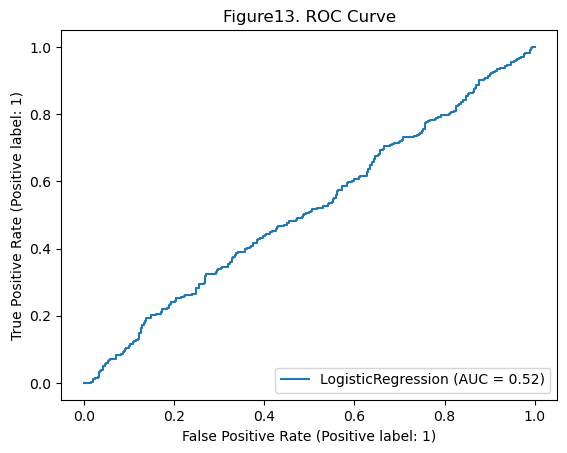

In [25]:
# ROC Curve of Logistic Model

log_disp = RocCurveDisplay.from_estimator(logistic, X_test, Y_test)
plt.title("Figure13. ROC Curve")  

#### Trading Strategy

In [26]:
dataset['Y_pred'] = np.NaN
dataset.iloc[(len(dataset) - len(Y_pred)):,-1] = Y_pred
trade_dataset = dataset.dropna()

######  Market (Tomorrow) Return

In [27]:
pd.options.mode.chained_assignment = None

trade_dataset['Market Returns'] = 0.
trade_dataset['Market Returns'] = np.log(trade_dataset['close']/trade_dataset['close'].shift(1)) #Daily log Return
trade_dataset['Market Returns'] = trade_dataset['Market Returns'].shift(-1) #Shifting t+1 into t
trade_dataset

open       high        low      close  High-Low  \
symbol date                                                               
wmt    2021-01-13  49.583332  49.689999  49.143333  49.150002  0.546665   
       2021-01-14  49.273335  49.333332  48.680000  48.990002  0.653332   
       2021-01-15  48.380001  48.633331  47.889999  48.213333  0.743332   
       2021-01-19  48.213333  48.356667  47.556667  47.796665  0.799999   
       2021-01-20  47.863335  48.553333  47.630001  48.503334  0.923332   
...                      ...        ...        ...        ...       ...   
       2023-12-22  51.816666  52.383331  51.720001  52.216667  0.663330   
       2023-12-26  52.216667  52.330002  52.036667  52.136665  0.293335   
       2023-12-27  52.103333  52.650002  52.053333  52.626667  0.596668   
       2023-12-28  52.590000  52.776669  52.500000  52.523335  0.276669   
       2023-12-29  52.509998  52.693333  52.386665  52.549999  0.306667   

                   Open-Close    3day MA   10day MA   30day MA  \
symbol date                                                      
wmt    2021-01-13   -0.433331  49.210000  48.703666  48.955111   
       2021-01-14   -0.283333  49.301112  48.808667  48.895778   
       2021-01-15   -0.166668  49.265556  48.901667  48.832778   
       2021-01-19   -0.416668  48.784445  48.918000  48.767444   
       2021-01-20    0.639999  48.333333  48.813333  48.701778   
...                       ...        ...        ...        ...   
       2023-12-22    0.400002  51.560000  51.047667  52.199778   
       2023-12-26   -0.080002  51.684444  51.240667  52.119000   
       2023-12-27    0.523335  51.984444  51.413000  52.010334   
       2023-12-28   -0.066666  52.326667  51.630333  51.901445   
       2023-12-29    0.040001  52.428889  51.747667  51.789445   

                   3day Std_deviation  30day Std_deviation  Price_Rise  \
symbol date                                                              
wmt    2021-01-13            0.309071             0.720709           0   
       2021-01-14            0.348030             0.616327           0   
       2021-01-15            0.501026             0.571582           0   
       2021-01-19            0.605651             0.565962           1   
       2021-01-20            0.355221             0.538569           0   
...                               ...                  ...         ...   
       2023-12-22            0.495427             1.640721           0   
       2023-12-26            0.335334             1.519641           1   
       2023-12-27            0.262869             1.337992           0   
       2023-12-28            0.258293             1.115277           1   
       2023-12-29            0.053645             0.670244           0   

                   Y_pred  Market Returns  
symbol date                                
wmt    2021-01-13     1.0       -0.003261  
       2021-01-14     1.0       -0.015981  
       2021-01-15     1.0       -0.008680  
       2021-01-19     0.0        0.014677  
       2021-01-20     1.0       -0.004546  
...                   ...             ...  
       2023-12-22     1.0       -0.001533  
       2023-12-26     0.0        0.009355  
       2023-12-27     1.0       -0.001965  
       2023-12-28     1.0        0.000508  
       2023-12-29     0.0             NaN  

[746 rows x 14 columns]

##### Strategy Return

In [28]:
trade_dataset['Strategy Returns'] = 0.
trade_dataset['Strategy Returns'] = np.where(trade_dataset['Y_pred'] == True, trade_dataset['Market Returns'],
                                             - trade_dataset['Market Returns'])
returns = trade_dataset.iloc[ :-1,11:]  #use iloc to only print the last four column of trade_dataset
returns

Price_Rise  Y_pred  Market Returns  Strategy Returns
symbol date                                                            
wmt    2021-01-13           0     1.0       -0.003261         -0.003261
       2021-01-14           0     1.0       -0.015981         -0.015981
       2021-01-15           0     1.0       -0.008680         -0.008680
       2021-01-19           1     0.0        0.014677         -0.014677
       2021-01-20           0     1.0       -0.004546         -0.004546
...                       ...     ...             ...               ...
       2023-12-21           1     0.0        0.011880         -0.011880
       2023-12-22           0     1.0       -0.001533         -0.001533
       2023-12-26           1     0.0        0.009355         -0.009355
       2023-12-27           0     1.0       -0.001965         -0.001965
       2023-12-28           1     1.0        0.000508          0.000508

[745 rows x 4 columns]

##### Cumulative Returns

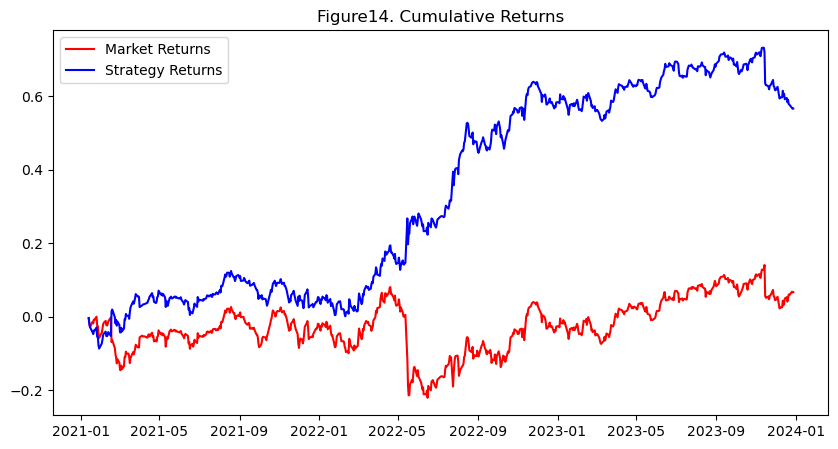

In [29]:
trade_dataset = trade_dataset.loc['wmt']  #Removing stock symble from data 

trade_dataset['Cumulative Market Returns'] = np.cumsum(trade_dataset['Market Returns'])
trade_dataset['Cumulative Strategy Returns'] = np.cumsum(trade_dataset['Strategy Returns'])

plt.figure(figsize=(10,5))
plt.plot(trade_dataset['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_dataset['Cumulative Strategy Returns'], color='b', label='Strategy Returns')
plt.title('Figure14. Cumulative Returns')
plt.legend()
plt.show()